<a href="https://colab.research.google.com/github/NaHyeonMaeng/CODE_Practice/blob/main/Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#라이브러리 불러오기
import os
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from PIL import Image

Contents 이미지

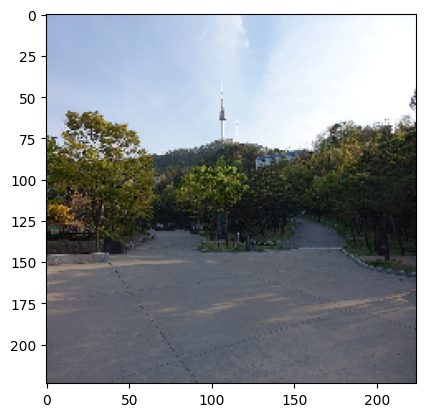

In [2]:
#사이즈 조정 후 이미지 출력
# 남산타워 원경 사진
contents = cv2.imread('contents.jfif')
contents = cv2.resize(contents, (224, 224))
plt.imshow(cv2.cvtColor(contents,cv2.COLOR_BGR2RGB))

Style 이미지

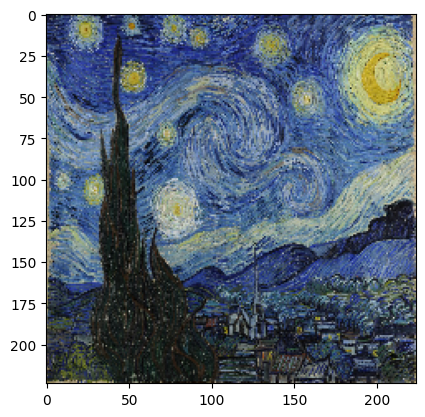

In [3]:
#사이즈 조정 후 이미지 출력
# 고흐 작품
style = cv2.imread('style.jpg')
style = cv2.resize(style, (224, 224))
plt.imshow(cv2.cvtColor(style,cv2.COLOR_BGR2RGB))

사전학습 모델

58889256/58889256 [==============================] - 0s 0us/step


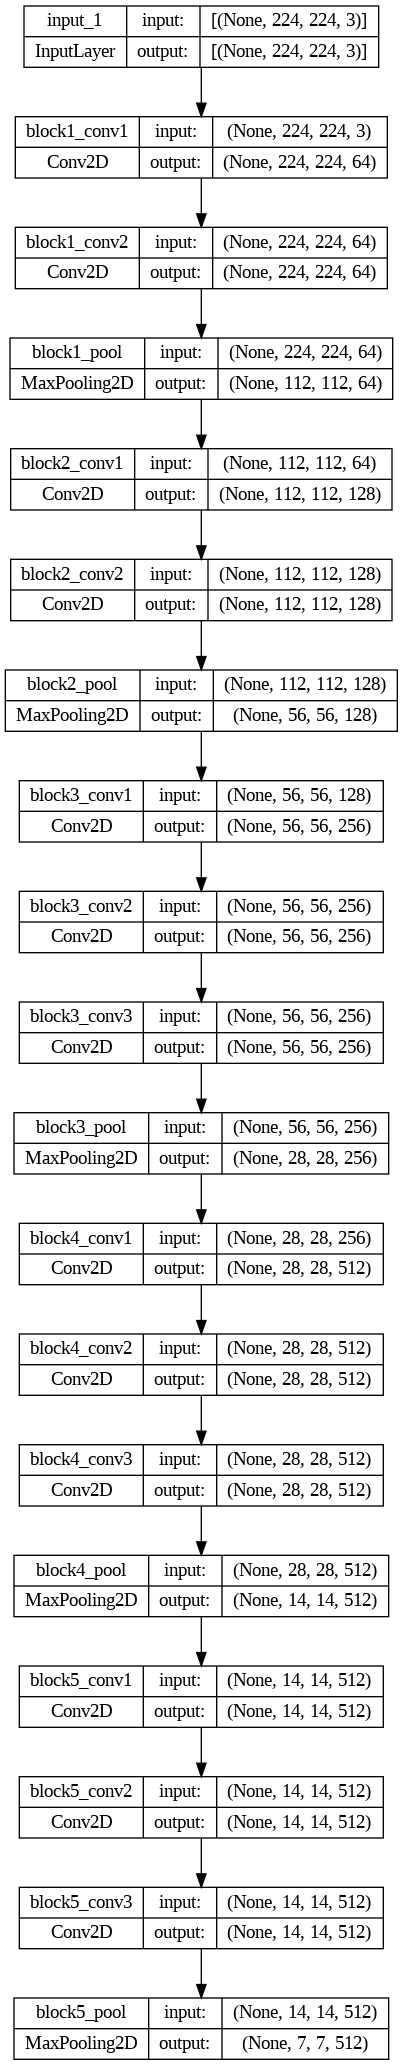

In [4]:
vgg_model=tf.keras.applications.VGG16(input_shape=(224,224,3),
                                      include_top=False,weights='imagenet')  #최종 레이어 제외
vgg_model.trainable=False  #파라미터 고정
tf.keras.utils.plot_model(vgg_model,show_shapes=True)

스타일 변환 모델

In [5]:
style_transfer_model=tf.keras.Model(inputs=[vgg_model.input],
                                    outputs=[
                                            vgg_model.get_layer(name='block1_conv2').output,
                                            vgg_model.get_layer(name='block2_conv2').output,
                                            vgg_model.get_layer(name='block3_conv3').output,
                                            vgg_model.get_layer(name='block4_conv3').output
])

style_transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [6]:
#Style Loss의 Ground True 값
style_true_b1c1, style_true_b2c2, style_true_b3c3, style_true_b4c3 = \
style_transfer_model.predict(np.reshape(style,(-1,224,224,3)))

style_true_b1c1.shape  #출력 형태 확인

1/1 [==============================] - 7s 7s/step


(1, 224, 224, 64)

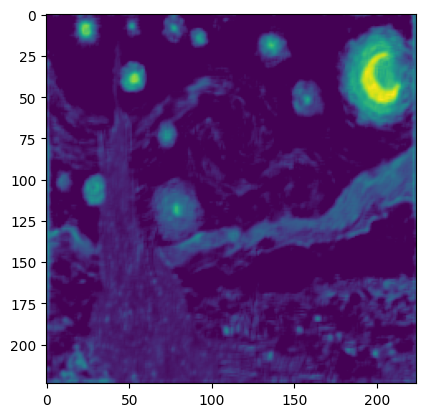

In [7]:
#Style 피처맵 시각화
plt.imshow(style_true_b1c1[0][:,:,60])

In [8]:
#Content Loss의 Ground True 값
contents_true_b1c1, contents_true_b2c2, contents_true_b3c3, contents_true_b4c3 = \
style_transfer_model.predict(np.reshape(contents,(-1,224,224,3)))

contents_true_b3c3.shape  #출력 형태 확인

1/1 [==============================] - 0s 139ms/step


(1, 56, 56, 256)

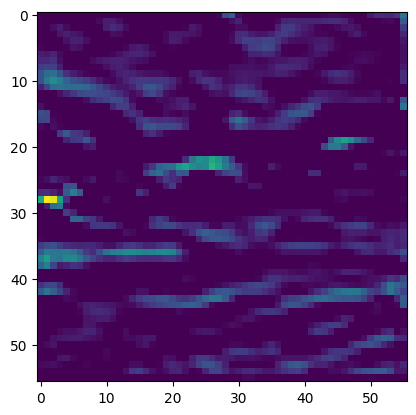

In [9]:
#Content 피처맵 시각화
plt.imshow(contents_true_b3c3[0][:,:,250])

In [10]:
#Gram Matrix 함수 정의
def gram_matrix(x):
    reshape_x=tf.transpose(x,[2,1,0])
    s = tf.shape(reshape_x)
    reshape_x=tf.reshape(reshape_x,(s[0],s[1]*s[2]))
    reshape_x_t=tf.transpose(reshape_x)
    dot=tf.matmul(reshape_x,reshape_x_t)
    dot=tf.cast(dot,dtype='float32')
    dot=dot/tf.cast(tf.shape(reshape_x)[0], tf.float32)/tf.cast(tf.shape(reshape_x)[1], tf.float32)
    return dot

gram_matrix(contents_true_b3c3[0])

<tf.Tensor: shape=(256, 256), dtype=float32, numpy=
array([[671.0898    , 300.31067   ,  29.798248  , ...,  79.880554  ,
         32.29058   ,  33.506176  ],
       [300.31067   , 677.1567    ,  38.14757   , ...,  76.13145   ,
         61.756287  ,  23.604467  ],
       [ 29.798248  ,  38.14757   ,  61.72365   , ...,  18.556252  ,
          0.72043455,   0.7689491 ],
       ...,
       [ 79.880554  ,  76.13145   ,  18.556252  , ..., 184.68987   ,
         18.262403  ,   1.3970368 ],
       [ 32.29058   ,  61.756287  ,   0.72043455, ...,  18.262403  ,
         94.53119   ,   5.902392  ],
       [ 33.506176  ,  23.604467  ,   0.7689491 , ...,   1.3970368 ,
          5.902392  ,  25.225632  ]], dtype=float32)>

In [11]:
# 스타일 변환을 적용할 남산타워 이미지를 입력 값으로 지정
input_image = cv2.imread('contents.jfif')
input_image = cv2.resize(input_image, (224, 224))


1
s_loss tf.Tensor(398357.4, shape=(), dtype=float32)
c_loss_3 tf.Tensor(79557.734, shape=(), dtype=float32)

2
s_loss tf.Tensor(341068.06, shape=(), dtype=float32)
c_loss_3 tf.Tensor(178789.33, shape=(), dtype=float32)

3
s_loss tf.Tensor(276242.44, shape=(), dtype=float32)
c_loss_3 tf.Tensor(113249.57, shape=(), dtype=float32)

4
s_loss tf.Tensor(250483.62, shape=(), dtype=float32)
c_loss_3 tf.Tensor(169968.05, shape=(), dtype=float32)

5
s_loss tf.Tensor(207671.52, shape=(), dtype=float32)
c_loss_3 tf.Tensor(126338.6, shape=(), dtype=float32)

6
s_loss tf.Tensor(213069.66, shape=(), dtype=float32)
c_loss_3 tf.Tensor(178086.86, shape=(), dtype=float32)

7
s_loss tf.Tensor(178973.23, shape=(), dtype=float32)
c_loss_3 tf.Tensor(130658.02, shape=(), dtype=float32)

8
s_loss tf.Tensor(187135.52, shape=(), dtype=float32)
c_loss_3 tf.Tensor(180982.58, shape=(), dtype=float32)

9
s_loss tf.Tensor(138564.81, shape=(), dtype=float32)
c_loss_3 tf.Tensor(141240.08, shape=(), dtype=float32)

10

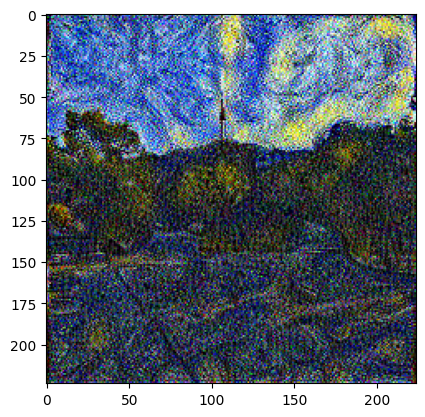

In [13]:
#스타일 변환 모델 학습
img_avi=np.zeros((224,224,3))
opt=tf.keras.optimizers.legacy.Adam(10.0) #이미지 변환 속도를 높이기 위해 학습률을 크게 설정

fcc=cv2.VideoWriter_fourcc(*'DIVX')
out=cv2.VideoWriter('style_transfer.avi',fcc,10.0,(224,224))

for epoch in range(200):
    input_image=tf.reshape(input_image,(-1,224,224,3))
    input_image=tf.cast(input_image,dtype='float32')
    input_image = tf.Variable(input_image, dtype=tf.float32)
    with tf.GradientTape() as tape:

        b1c1,b2c2,b3c3,b4c3=style_transfer_model(input_image)

        s_loss_1=tf.stop_gradient(gram_matrix(style_true_b1c1[0]))-gram_matrix(b1c1[0])
        s_loss_1=tf.reduce_mean(tf.square(s_loss_1))
        s_loss_2=tf.stop_gradient(gram_matrix(style_true_b2c2[0]))-gram_matrix(b2c2[0])
        s_loss_2=tf.reduce_mean(s_loss_2*s_loss_2)
        s_loss_3=tf.stop_gradient(gram_matrix(style_true_b3c3[0]))-gram_matrix(b3c3[0])
        s_loss_3=tf.reduce_mean(s_loss_3*s_loss_3)
        s_loss_4=tf.stop_gradient(gram_matrix(style_true_b4c3[0]))-gram_matrix(b4c3[0])
        s_loss_4=tf.reduce_mean(s_loss_4*s_loss_4)

        c_loss_1=contents_true_b1c1-b1c1
        c_loss_1=tf.reduce_mean(tf.square(c_loss_1))
        c_loss_2=contents_true_b2c2-b2c2
        c_loss_2=tf.reduce_mean(tf.square(c_loss_2))
        c_loss_3=contents_true_b3c3-b3c3
        c_loss_3=tf.reduce_mean(tf.square(c_loss_3))
        c_loss_4=contents_true_b4c3-b4c3
        c_loss_4=tf.reduce_mean(tf.square(c_loss_4))

        s_loss=(s_loss_1+s_loss_2+s_loss_3+s_loss_4)
        c_loss=(c_loss_1+c_loss_2+c_loss_3+c_loss_4)/4.
        loss=s_loss*10.0+c_loss_3  #style loss와 content loss의 가중합 적용
    grad=tape.gradient(loss,input_image)
    opt.apply_gradients([(grad,input_image)])
    input_image=tf.cast(input_image,dtype=tf.int32)
    input_image=tf.clip_by_value(input_image,0,255)
    img_avi=input_image.numpy()[0]
    if((epoch+0)%10==0):
        cv2.imwrite('{}.jpg'.format(epoch), img_avi)
    out.write(np.uint8(img_avi))
    print()
    print(epoch+1)
    print('s_loss',s_loss)
    print('c_loss_3',c_loss_3)
plt.imshow(input_image[0][:,:,::-1])
out.release()
cv2.destroyAllWindows()